<a href="https://colab.research.google.com/github/davidsabogal-gif/ProyectoAn-lisisDeDatos/blob/main/ACA2_Anal%C3%ADticaTomaDecisiones_(4)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargue de la base de datos completa de PQR
root = Path("/content/drive/MyDrive/Analitica")

df = pd.read_csv(
    root / "pqr_medicamentos.csv",
    sep=";",
    engine="python"
)

df.head()

,OID_,A¥O,MES,PQR_CANAL,PET_COD_DEPTO,PET_COD_MPIO,ID_AFEC,AFEC_PARENTESCO,AFEC_GENERO,AFEC_EDADR,...,MACROMOTIVO,COD_MOTGEN,MOTIVO_GENERAL,COD_MOTESP,MOTIVO_ESPECIFICO,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10,RIESGO_VIDA,ALTO_COSTO
0,4,2021,1,Telefonico,68.0,68276.0,US- 000001949695,Otro,Hombre,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RENALES,"IRC, ENFERMEDAD RENAL",ENFERMEDAD RENAL CRONICA,SI,DIALISIS PERITONEAL
1,13,2021,7,Telefonico,68.0,68276.0,US- 000001949698,Hijo (A),Hombre,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,ENFERMEDADES CRONICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSION ARTERIAL),"DOLOR EN EL PECHO, NO ESPECIFICADO",SI,NO APLICA
2,15,2021,2,Personalizado,63.0,63130.0,US- 000000931064,Nombre Propio,Hombre,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1040,RESTRICCION EN EL ACCESO POR NEGACION DE LA AU...,10402,NEGACION DE LA AUTORIZACION DE MEDICAMENTOS NO...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,CARDIOMIOPATIA ISQUMICA,SI,NO APLICA
3,34,2021,9,Telefonico,68.0,68001.0,US- 000001039632,Otro,Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,"OTRAS OSTEOPOROSIS, CON FRACTURA PATOLOGICA",NO,NO APLICA
4,66,2021,4,Web,76.0,76147.0,US- 000001066882,Nombre Propio,Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,EMBOLIA Y TROMBOSIS DE VENA NO ESPECIFICADA,NO,NO APLICA


In [ ]:
#Corrección de la codificación
for col in df.select_dtypes(include="object").columns:
    df[col] = (
        df[col]
        .str.encode("latin1", errors="ignore")
        .str.decode("utf-8", errors="ignore")
    )

In [ ]:
#Validación de los datos
print(df.head())
print(df.shape)

   OID_   A¥O  MES      PQR_CANAL  PET_COD_DEPTO  PET_COD_MPIO  \
0     4  2021    1     Telefonico           68.0       68276.0   
1    13  2021    7     Telefonico           68.0       68276.0   
2    15  2021    2  Personalizado           63.0       63130.0   
3    34  2021    9     Telefonico           68.0       68001.0   
4    66  2021    4            Web           76.0       76147.0   

            ID_AFEC AFEC_PARENTESCO AFEC_GENERO    AFEC_EDADR  ...  \
0  US- 000001949695            Otro      Hombre   DE 50 A 62   ...   
1  US- 000001949698        Hijo (A)      Hombre  MAYOR DE 63   ...   
2  US- 000000931064   Nombre Propio      Hombre   DE 50 A 62   ...   
3  US- 000001039632            Otro       Mujer  MAYOR DE 63   ...   
4  US- 000001066882   Nombre Propio       Mujer   DE 50 A 62   ...   

                                         MACROMOTIVO COD_MOTGEN  \
0  RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD       1030   
1  RESTRICCION EN EL ACCESO A LOS SERVICIOS DE S

In [ ]:
#Se realizó la estandarización de los nombres de las variables, corrigiendo problemas de codificación y adoptando nombres descriptivos y consistentes.
df = df.rename(columns={
    "oid_": "id_registro",
    "a¥o": "anio",
    "mes": "mes",
    "pqr_canal": "canal_pqr",
    "pet_cod_depto": "cod_depto_peticion",
    "pet_cod_mpio": "cod_mpio_peticion",
    "id_afec": "id_afectado",
    "afec_parentesco": "parentesco_afectado",
    "afec_genero": "genero_afectado",
    "afec_edadr": "rango_edad_afectado",
    "afec_educ": "nivel_educativo_afectado",
    "afec_regafiliacion": "regimen_afiliacion_afectado",
    "afec_getnico": "grupo_etnico_afectado",
    "afec_pobespecial": "poblacion_especial_afectado",
    "afec_cod_depto": "cod_depto_afectado",
    "afec_cod_mpio": "cod_mpio_afectado",
    "ent_nombre": "nombre_entidad",
    "ent_tipovig_sns": "tipo_vigencia_sns",
    "ent_cod_sns": "codigo_sns_entidad",
    "ent_alias_sns": "alias_entidad"
})


In [ ]:
#Convertir los nombres de las columnas a minúscula y reemplazar los espacios por guión bajo
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
#Validar nombre de las columnas
df.columns

Index(['id_registro', 'anio', 'mes', 'canal_pqr', 'cod_depto_peticion',
       'cod_mpio_peticion', 'id_afectado', 'parentesco_afectado',
       'genero_afectado', 'rango_edad_afectado', 'nivel_educativo_afectado',
       'regimen_afiliacion_afectado', 'grupo_etnico_afectado',
       'poblacion_especial_afectado', 'cod_depto_afectado',
       'cod_mpio_afectado', 'nombre_entidad', 'tipo_vigencia_sns',
       'codigo_sns_entidad', 'alias_entidad', 'ent_cod_depto', 'ent_cod_mpio',
       'cod_macromot', 'macromotivo', 'cod_motgen', 'motivo_general',
       'cod_motesp', 'motivo_especifico', 'patologia_1', 'patologia_tipo',
       'cie_10', 'riesgo_vida', 'alto_costo'],
      dtype='object')

Se realiza la limpieza de los datos, eliminando las columnas que no son necesarias y agregando una categoría para los datos faltantes

In [ ]:
#Filtrar la base solamente por el departamento de Cundinamarca
df_cundinamarca = df[df["cod_depto_peticion"] == 25]


In [ ]:
#Información de la base seleccionada
df_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12173 entries, 13 to 328931
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_registro                  12173 non-null  int64  
 1   anio                         12173 non-null  int64  
 2   mes                          12173 non-null  int64  
 3   canal_pqr                    12173 non-null  object 
 4   cod_depto_peticion           12173 non-null  float64
 5   cod_mpio_peticion            12173 non-null  float64
 6   id_afectado                  12173 non-null  object 
 7   parentesco_afectado          12173 non-null  object 
 8   genero_afectado              12173 non-null  object 
 9   rango_edad_afectado          12173 non-null  object 
 10  nivel_educativo_afectado     12173 non-null  object 
 11  regimen_afiliacion_afectado  12173 non-null  object 
 12  grupo_etnico_afectado        12173 non-null  object 
 13  poblacion_especial_

In [ ]:
#Cantidad de filas y columnas
df_cundinamarca.shape

(12173, 33)

In [ ]:
#Descripción estadística de la información
df_cundinamarca.describe()

,id_registro,anio,mes,cod_depto_peticion,cod_mpio_peticion,cod_depto_afectado,cod_mpio_afectado,ent_cod_depto,ent_cod_mpio,cod_macromot,cod_motgen,cod_motesp
count,1.217300e+04,12173.000000,12173.000000,12173.0,12173.000000,12170.000000,12170.000000,12173.000000,12173.000000,12173.000000,12173.000000,12173.000000
mean,5.067160e+05,2021.926477,5.889920,25.0,25496.876694,24.925637,25411.249219,23.174485,23581.565103,1.026534,1043.582519,10452.023084
std,3.221194e+05,0.741099,3.428181,0.0,261.808901,3.502575,3534.848453,7.077370,7197.994955,0.433219,433.118565,4330.293842
min,4.000000e+01,2021.000000,1.000000,25.0,25001.000000,5.000000,5001.000000,5.000000,5001.000000,1.000000,1010.000000,10119.000000
25%,2.464180e+05,2021.000000,3.000000,25.0,25286.000000,25.000000,25286.000000,25.000000,25175.000000,1.000000,1010.000000,10119.000000
50%,4.728030e+05,2022.000000,5.000000,25.0,25430.000000,25.000000,25430.000000,25.000000,25317.000000,1.000000,1010.000000,10120.000000
75%,7.273480e+05,2022.000000,9.000000,25.0,25754.000000,25.000000,25754.000000,25.000000,25754.000000,1.000000,1030.000000,10301.000000
max,1.246682e+06,2023.000000,12.000000,25.0,25899.000000,91.000000,91001.000000,91.000000,91001.000000,10.000000,10020.000000,100203.000000


In [ ]:
#Validación de duplicados
df_cundinamarca.duplicated().sum()
df_cundinamarca[df_cundinamarca.duplicated()]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [ ]:
#Revisión de valores nulos
df_cundinamarca.isnull().sum()

,0
id_registro,0
anio,0
mes,0
canal_pqr,0
cod_depto_peticion,0
cod_mpio_peticion,0
id_afectado,0
parentesco_afectado,0
genero_afectado,0
rango_edad_afectado,0


In [ ]:
#Revisar valores nulos en código de departamento
df_cundinamarca[df_cundinamarca["cod_depto_afectado"].isnull() | (df_cundinamarca["cod_depto_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo
2285,20194,2021,1,Escrito,25.0,25899.0,US- 000001998267,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10319,DEMORA DE LA AUTORIZACION DE INSUMOS POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RESPIRA...,NEUMONIA,CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFI...,SI,NO APLICA
89231,786570,2021,4,Telefonico,25.0,25758.0,US- 000001995196,Hijo (A),Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,SINDROME DEL COLON IRRITABLE,NO,NO APLICA
112944,987084,2021,1,Web,25.0,25754.0,US- 000001806473,Madre,Hombre,DE 6 A 12,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTRAS ATENCIONES MEDICAS ESPECIFICADAS,NO,NO APLICA


In [ ]:
#Revisar valores nulos en código de municipio
df_cundinamarca[df_cundinamarca["cod_mpio_afectado"].isnull() | (df_cundinamarca["cod_mpio_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo
2285,20194,2021,1,Escrito,25.0,25899.0,US- 000001998267,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10319,DEMORA DE LA AUTORIZACION DE INSUMOS POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RESPIRA...,NEUMONIA,CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFI...,SI,NO APLICA
89231,786570,2021,4,Telefonico,25.0,25758.0,US- 000001995196,Hijo (A),Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,SINDROME DEL COLON IRRITABLE,NO,NO APLICA
112944,987084,2021,1,Web,25.0,25754.0,US- 000001806473,Madre,Hombre,DE 6 A 12,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTRAS ATENCIONES MEDICAS ESPECIFICADAS,NO,NO APLICA


In [ ]:
#Reemplazar valores nulos con 0
df_cundinamarca["cod_depto_afectado"] = df_cundinamarca["cod_depto_afectado"].fillna(0)
df_cundinamarca["cod_mpio_afectado"] = df_cundinamarca["cod_mpio_afectado"].fillna(0)

/tmp/ipython-input-3749357366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca["cod_depto_afectado"] = df_cundinamarca["cod_depto_afectado"].fillna(0)
/tmp/ipython-input-3749357366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca["cod_mpio_afectado"] = df_cundinamarca["cod_mpio_afectado"].fillna(0)


In [ ]:
#Revisión valores nulos
df_cundinamarca[df_cundinamarca["cod_mpio_afectado"].isnull() | (df_cundinamarca["cod_mpio_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [ ]:
#Revisión valores nulos
df_cundinamarca[df_cundinamarca["cod_depto_afectado"].isnull() | (df_cundinamarca["cod_depto_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [ ]:
df_cundinamarca["riesgo_vida"].value_counts()

,count
riesgo_vida,
NO,7759
SI,4414


In [ ]:
df_cundinamarca["riesgo_vida"].value_counts(normalize=True)

,proportion
riesgo_vida,
NO,0.637394
SI,0.362606


In [ ]:
df_cundinamarca["canal_pqr"].value_counts()

,count
canal_pqr,
Web,5195
Telefonico,3583
Personalizado,1529
Escrito,887
Chat,412
Redes Sociales,287
Correo,266
Evento,14


In [ ]:
df_cundinamarca["genero_afectado"].value_counts(normalize=True) * 100

,proportion
genero_afectado,
Mujer,57.808264
Hombre,42.191736


In [ ]:
df_cundinamarca["rango_edad_afectado"].value_counts(normalize=True) * 100

,proportion
rango_edad_afectado,
MAYOR DE 63,49.675511
DE 50 A 62,21.095868
DE 38 A 49,11.624086
DE 30 A 37,5.347901
DE 6 A 12,3.343465
DE 18 A 24,2.973794
DE 25 A 29,2.480900
DE 13 A 17,2.045511
DE 0 A 5,1.412963


In [ ]:
df_cundinamarca

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo
13,148,2021,2,Telefonico,25.0,25754.0,US- 000002087509,Nombre Propio,Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10120,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,DISFONIA,NO,NO APLICA
28,325,2021,11,Personalizado,25.0,25754.0,US- 000002031839,Nombre Propio,Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1040,RESTRICCION EN EL ACCESO POR NEGACION DE LA AU...,10401,NEGACION DE LA AUTORIZACION DE MEDICAMENTOS POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES DIABETES,DIABETES,DIABETES MELLITUS NO INSULINODEPENDIENTE,NO,NO APLICA
42,577,2021,2,Personalizado,25.0,25594.0,US- 000001847486,Nombre Propio,Mujer,DE 38 A 49,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10320,DEMORA DE LA AUTORIZACION DE INSUMOS NO-POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,NO,NO APLICA
83,1004,2021,8,Telefonico,25.0,25473.0,US- 000001585932,Nombre Propio,Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,ENFERMEDADES CRONICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSION ARTERIAL),HIPERTENSION ESENCIAL (PRIMARIA),SI,NO APLICA
98,1119,2021,10,Web,25.0,25307.0,US- 000000107516,Nombre Propio,Hombre,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,NO,NO APLICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328783,699143,2023,4,Personalizado,25.0,25745.0,US- 000001503205,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,ENFERMEDADES CRONICAS NO TRANSMISIBLES DIABETES,DIABETES,DIABETES MELLITUS INSULINODEPENDIENTE,SI,NO APLICA
328784,699144,2023,6,Personalizado,25.0,25745.0,US- 000001503205,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10320,DEMORA DE LA AUTORIZACION DE INSUMOS NO-POS,ENFERMEDADES CRONICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSION ARTERIAL),OTRAS INCONTINENCIAS URINARIAS ESPECIFICADAS,NO,NO APLICA
328785,699145,2023,4,Escrito,25.0,25745.0,US- 000001503205,Otro,Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,ENFERMEDADES CRONICAS NO TRANSMISIBLES- FACTOR...,MEDICION DE FACTORES DE RIESGO,OTRAS INFECCIONES LOCALES ESPECIFICADAS DE LA ...,NO,NO APLICA
328787,699153,2023,1,Web,25.0,25754.0,US- 000003109827,Nombre Propio,Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,"GASTRITIS, NO ESPECIFICADA",NO,NO APLICA


**Análisis descriptivo y diagnóstico**

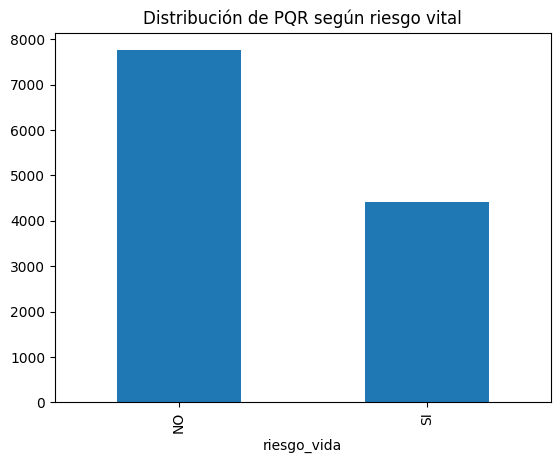

In [ ]:
#Análisis univariado
df_cundinamarca["riesgo_vida"].value_counts().plot(kind="bar")
plt.title("Distribución de PQR según riesgo vital")
plt.show()

<Axes: title={'center': 'Distribución por rango de edad afectado'}, ylabel='count'>

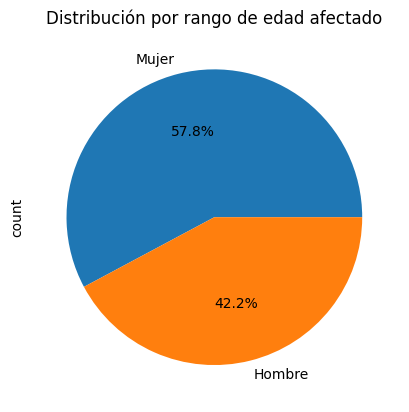

In [ ]:
df_cundinamarca["genero_afectado"].describe()
df_cundinamarca["genero_afectado"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Distribución por rango de edad afectado"
)

<Axes: title={'center': 'Top 10 PQR según el canal'}, ylabel='canal_pqr'>

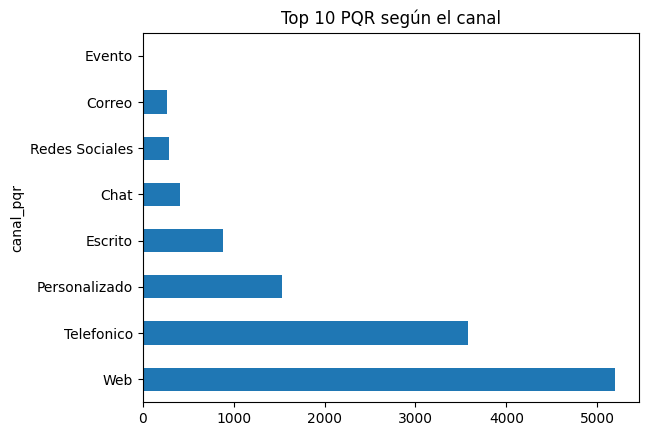

In [ ]:
df_cundinamarca["canal_pqr"].value_counts().head(10).plot(
    kind="barh", title="Top 10 PQR según el canal"
)

In [ ]:
#Se filtraron únicamente los registros correspondientes a enfermedades crónicas no transmisibles, dado que estas requieren tratamiento farmacológico continuo y presentan mayor impacto en el riesgo vital.
patologias_ecnt = [
    "DIABETES",
    "HTA (HIPERTENSION ARTERIAL)",
    "EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",
    "ENFERMEDAD ISQUMICA CORONARIA",
    "ICC (INSUFICIENCIA CARDIACA CONGESTIVA)",
    "IRC, ENFERMEDAD RENAL",
    "IRC, TRASPLANTE",
    "OBESIDAD",
    "SOBREPESO",
    "ACV (ACCIDENTE CEREBRO VASCULAR)",
    "ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA"
]
df_cundinamarca = df[
    df["patologia_tipo"].isin(patologias_ecnt)
].copy()



In [ ]:
df_cundinamarca["patologia_tipo"].value_counts(normalize=True) * 100

,proportion
patologia_tipo,
HTA (HIPERTENSION ARTERIAL),49.434054
DIABETES,29.753535
"EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",7.366792
"IRC, ENFERMEDAD RENAL",4.045764
ACV (ACCIDENTE CEREBRO VASCULAR),3.542928
OBESIDAD,2.444288
ICC (INSUFICIENCIA CARDIACA CONGESTIVA),1.553975
"IRC, TRASPLANTE",1.316468
ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA,0.460764


<Axes: title={'center': 'Top 10 de patologías'}, ylabel='patologia_tipo'>

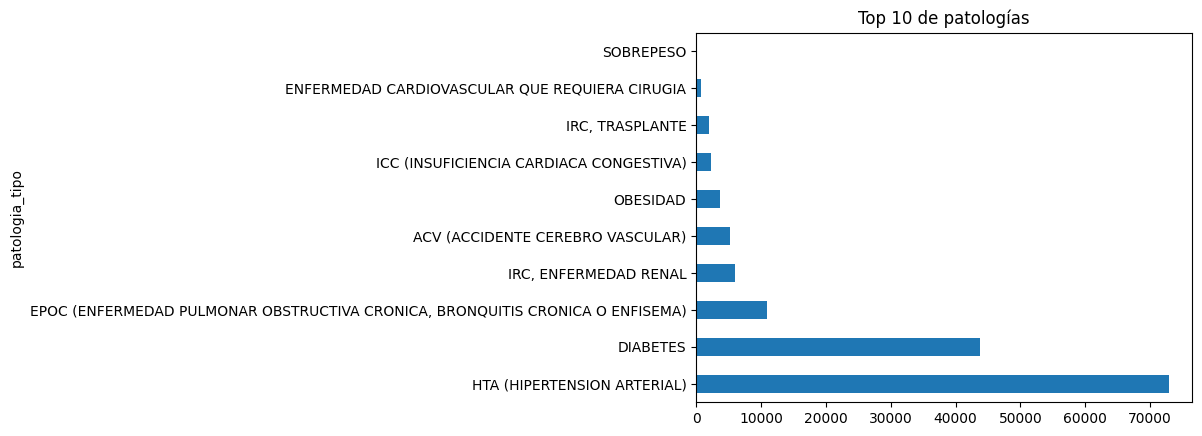

In [ ]:
df_cundinamarca["patologia_tipo"].value_counts().head(10).plot(
    kind='barh', title="Top 10 de patologías"
)

In [ ]:
df_cundinamarca['motivo_especifico'].value_counts()


,count
motivo_especifico,
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS,77728
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS,27744
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,10598
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,10207
DEMORA DE LA AUTORIZACION DE INSUMOS NO-POS,5901
DEMORA DE LA AUTORIZACION DE INSUMOS POS,4770
FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS,2495
NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS,1729
NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS,1213


In [ ]:
#Se identificaron los motivos específicos asociados a fallas en la entrega y autorización de medicamentos, los cuales fueron utilizados para construir la variable objetivo.
motivos_falla_medicamentos = [
    'FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS',
    'FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS',
    'FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS',
    'NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS',
    'NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS',
    'NEGACION DE LA AUTORIZACION DE MEDICAMENTOS POS',
    'NEGACION DE LA AUTORIZACION DE MEDICAMENTOS NO-POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS PARA ENFERMEDADES RARAS O HUERFANAS',
    'FALTA DE CONTRATACION PARA LA ENTREGA OPORTUNA Y CONTINUA DE MEDICAMENTOS DE ALTO COSTO'
]


In [ ]:
df_cundinamarca = df_cundinamarca[
    df_cundinamarca["motivo_especifico"].isin(motivos_falla_medicamentos)
].copy()


In [ ]:
df_cundinamarca['motivo_especifico'].value_counts()

,count
motivo_especifico,
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS,77728
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS,27744
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,10598
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,10207
FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS,2495
NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS,1729
NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS,1213
NEGACION DE LA AUTORIZACION DE MEDICAMENTOS POS,493
FALTA DE CONTRATACION PARA LA ENTREGA OPORTUNA Y CONTINUA DE MEDICAMENTOS DE ALTO COSTO,360


In [ ]:
def clasificar_tipo_falla(motivo):
    if "FALTA DE OPORTUNIDAD" in motivo or "FRACCIONAMIENTO" in motivo:
        return "Falta de oportunidad en entrega"
    if "FRACCIONAMIENTO" in motivo:
        return "Falta de meidcamentos y entrega incompleta"
    elif "DEMORA DE LA AUTORIZACION" in motivo:
        return "Demora en autorización"
    elif "NEGACION DE LA AUTORIZACION" in motivo:
        return "Negación de autorización"
    elif "NEGACION PARA LA ENTREGA" in motivo:
        return "Negación de entrega"
    elif "ALTO COSTO" in motivo or "RARAS O HUERFANAS" in motivo:
        return "Alto costo"
    else:
        return "Otro"


df_cundinamarca["tipo_falla"] = df_cundinamarca["motivo_especifico"].apply(clasificar_tipo_falla)



In [ ]:
df_cundinamarca['tipo_falla'].value_counts()

,count
tipo_falla,
Falta de oportunidad en entrega,107967
Demora en autorización,20814
Negación de entrega,2942
Negación de autorización,787
Alto costo,360


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_cundinamarca.to_csv(
    "/content/drive/MyDrive/Analitica/base_cundinamarca.csv",
    index=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Comparación entre grupos relevantes**

In [ ]:
#Se convierte a binaria la variable de riesgo vital y se almacena en una nueva variable llamada riesgo_bin
df_cundinamarca["riesgo_bin"] = df_cundinamarca["riesgo_vida"].map({"SI":1, "NO":0})

In [ ]:
#probabilidad relativa de riesgo por rango de edades.
pd.crosstab(df_cundinamarca["rango_edad_afectado"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
rango_edad_afectado,,
DE 0 A 5,16.230366,83.769634
DE 13 A 17,18.290598,81.709402
DE 18 A 24,42.509506,57.490494
DE 25 A 29,39.768683,60.231317
DE 30 A 37,47.404130,52.595870
DE 38 A 49,52.544208,47.455792
DE 50 A 62,54.722465,45.277535
DE 6 A 12,16.560510,83.439490
MAYOR DE 63,51.500176,48.499824


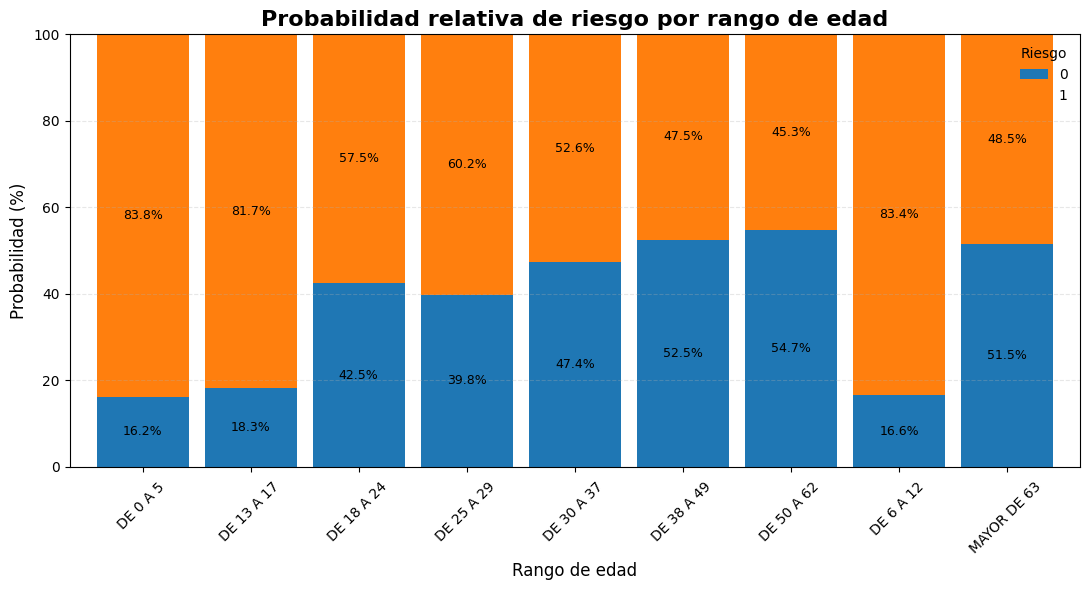

In [ ]:

# ===== Tabla de probabilidad relativa de riesgo por rango de edades =====
tabla = (
    pd.crosstab(
        df_cundinamarca["rango_edad_afectado"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
).sort_index()

fig, ax = plt.subplots(figsize=(11, 6))

tabla.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.85
)

# Títulos y estilo
ax.set_title("Probabilidad relativa de riesgo por rango de edad", fontsize=16, weight="bold")
ax.set_xlabel("Rango de edad", fontsize=12)
ax.set_ylabel("Probabilidad (%)", fontsize=12)

ax.set_ylim(0, 100)
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.legend(title="Riesgo", frameon=False)

plt.xticks(rotation=45)

# ===== Etiquetas % encima de cada segmento =====
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()


In [ ]:
#probabilidad relativa de riesgo por el tipo de patología
pd.crosstab(df_cundinamarca["patologia_tipo"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
patologia_tipo,,
ACV (ACCIDENTE CEREBRO VASCULAR),28.435266,71.564734
DIABETES,41.556460,58.443540
ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA,23.762376,76.237624
"EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",40.901389,59.098611
HTA (HIPERTENSION ARTERIAL),64.123343,35.876657
ICC (INSUFICIENCIA CARDIACA CONGESTIVA),15.884812,84.115188
"IRC, ENFERMEDAD RENAL",19.840031,80.159969
"IRC, TRASPLANTE",1.468189,98.531811
OBESIDAD,78.375149,21.624851


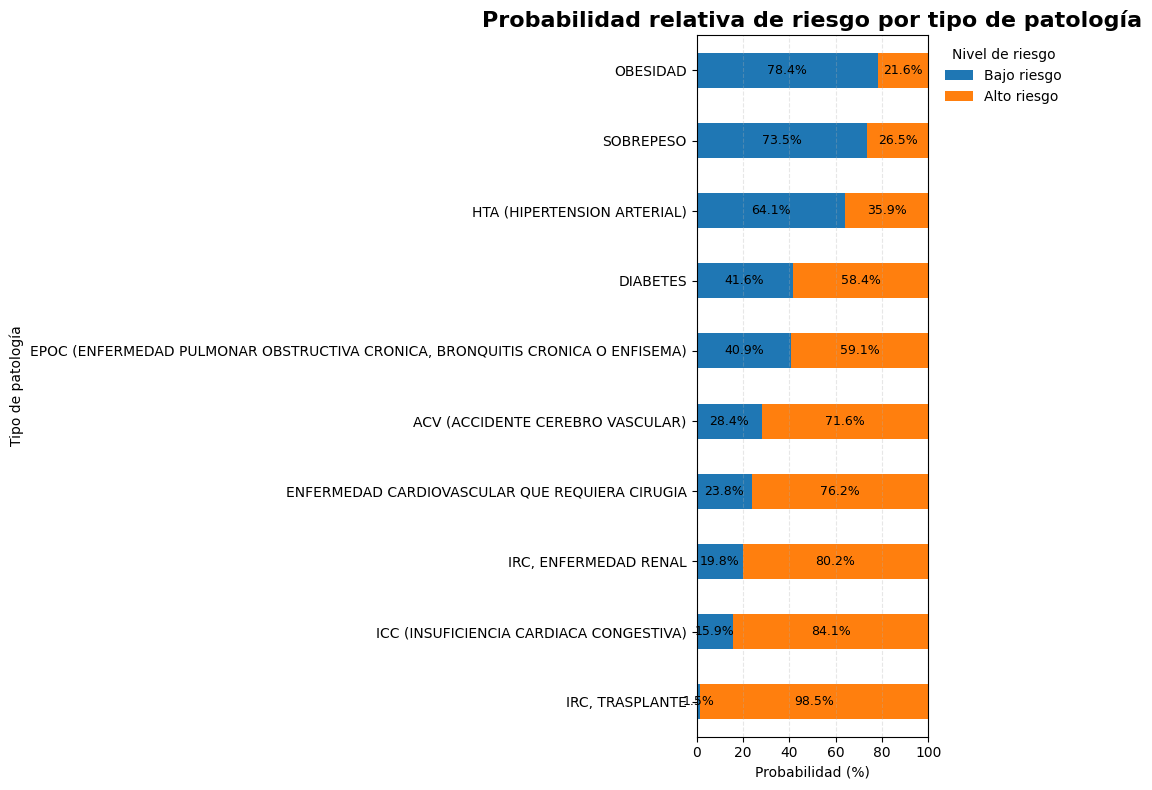

In [ ]:

# ===== Tabla de probabilidades relativa de riesgo por el tipo de patología =====
tabla = (
    pd.crosstab(
        df_cundinamarca["patologia_tipo"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla = tabla.sort_values(by=1, ascending=False)
tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(11, 8))

tabla.plot(
    kind="barh",
    stacked=True,
    ax=ax
)

ax.set_title("Probabilidad relativa de riesgo por tipo de patología", fontsize=16, weight="bold")
ax.set_xlabel("Probabilidad (%)")
ax.set_ylabel("Tipo de patología")

ax.set_xlim(0, 100)
ax.grid(axis="x", linestyle="--", alpha=0.3)

ax.legend(
    title="Nivel de riesgo",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

# Etiquetas %
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:
#probabilidad relativa de riesgo por el motivo específico.
pd.crosstab(df_cundinamarca["tipo_falla"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
tipo_falla,,
Alto costo,38.333333,61.666667
Demora en autorización,46.531181,53.468819
Falta de oportunidad en entrega,52.789278,47.210722
Negación de autorización,49.174079,50.825921
Negación de entrega,50.985724,49.014276


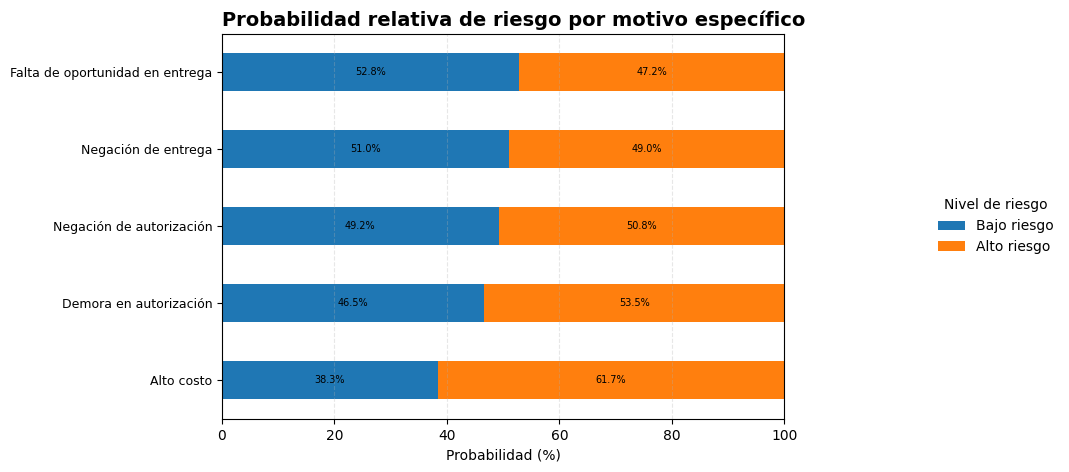

In [ ]:
# ===== Tabla de probabilidades (%) relativa de riesgo por el motivo específico. =====
tabla = (
    pd.crosstab(
        df_cundinamarca["tipo_falla"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla = tabla.sort_values(by=1, ascending=False)

tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(9, 5))

tabla.plot(
    kind="barh",
    stacked=True,
    ax=ax
)

ax.set_title(
    "Probabilidad relativa de riesgo por motivo específico",
    fontsize=14,
    weight="bold",
    loc="left"
)

ax.set_xlabel("Probabilidad (%)")
ax.set_ylabel("")
ax.set_xlim(0, 100)
ax.grid(axis="x", linestyle="--", alpha=0.3)

ax.legend(
    title="Nivel de riesgo",
    bbox_to_anchor=(1.25, 0.5),
    loc="center left",
    frameon=False
)

# Etiquetas %
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=7)

ax.tick_params(axis='y', labelsize=9)
plt.subplots_adjust(right=0.75)

plt.show()

In [ ]:
#probabilidad relativa de riesgo por canal pqr.
pd.crosstab(df_cundinamarca["canal_pqr"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
canal_pqr,,
Chat,48.069241,51.930759
Correo,65.441176,34.558824
Escrito,63.777024,36.222976
Evento,6.140351,93.859649
Medios de comunicacion,25.000000,75.000000
Personalizado,53.328558,46.671442
Redes Sociales,0.387020,99.612980
Telefonico,50.124884,49.875116
Web,57.816690,42.183310


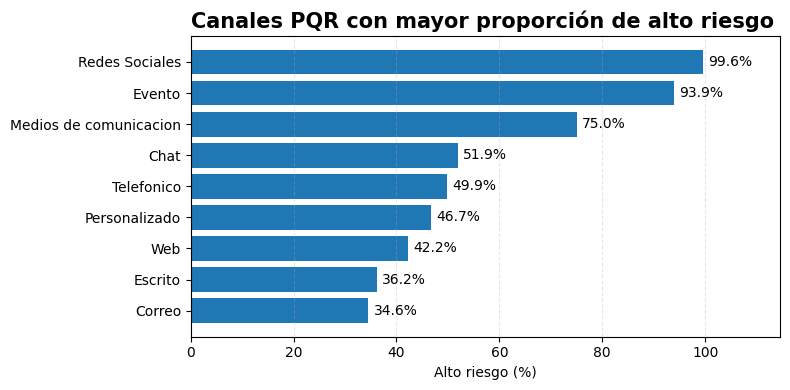

In [ ]:
tabla = (
    pd.crosstab(
        df_cundinamarca["canal_pqr"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

alto = tabla[1].sort_values(ascending=True)  # orden ranking
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(alto.index, alto.values)
ax.set_title(
    "Canales PQR con mayor proporción de alto riesgo",
    fontsize=15,
    weight="bold",
    loc="left"
)
ax.set_xlabel("Alto riesgo (%)")
ax.set_ylabel("")

ax.grid(axis="x", linestyle="--", alpha=0.3)

# etiquetas al final de cada barra
for i, v in enumerate(alto.values):
    ax.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=10)

ax.set_xlim(0, max(alto.values) * 1.15)

plt.tight_layout()
plt.show()


In [ ]:
#probabilidad relativa de riesgo por régimen afectado
pd.crosstab(df_cundinamarca["regimen_afiliacion_afectado"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
regimen_afiliacion_afectado,,
Contributivo,52.598134,47.401866
No Aplica,57.534247,42.465753
PNA,17.647059,82.352941
Particular,55.555556,44.444444
Regimen Especial,58.672892,41.327108
Subsidiado,49.248011,50.751989


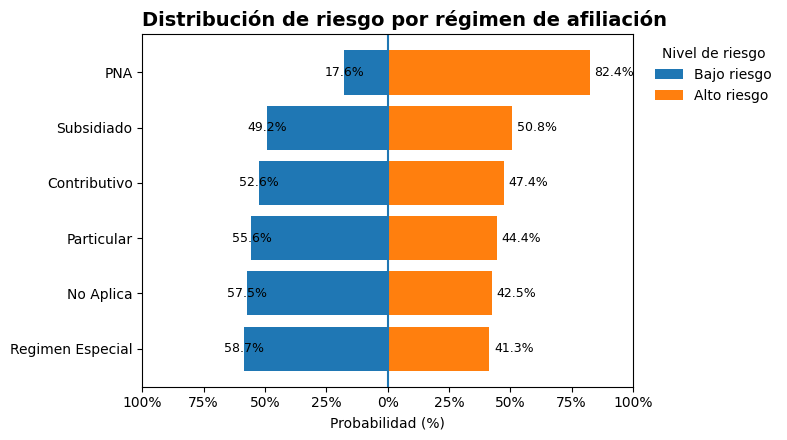

In [ ]:

# ===== Probabilidad relativa de riesgo por régimen afectado=====
tabla = (
    pd.crosstab(
        df_cundinamarca["regimen_afiliacion_afectado"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ordenar por alto riesgo
tabla = tabla.sort_values(by="Alto riesgo", ascending=True)

# convertir bajo a negativo (para efecto divergente)
bajo = -tabla["Bajo riesgo"]
alto = tabla["Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(8, 4.5))

ax.barh(tabla.index, bajo, label="Bajo riesgo")
ax.barh(tabla.index, alto, label="Alto riesgo")

ax.set_title(
    "Distribución de riesgo por régimen de afiliación",
    fontsize=14,
    weight="bold",
    loc="left"
)

# eje simétrico
ax.set_xlim(-100, 100)

# mostrar valores absolutos en el eje
ax.set_xticks(range(-100, 101, 25))
ax.set_xticklabels([f"{abs(x)}%" for x in range(-100, 101, 25)])

ax.axvline(0)  # línea central
ax.set_ylabel("")
ax.set_xlabel("Probabilidad (%)")

# etiquetas
for i, v in enumerate(alto):
    ax.text(v + 2, i, f"{v:.1f}%", va="center", fontsize=9)

for i, v in enumerate(bajo):
    ax.text(v - 8, i, f"{abs(v):.1f}%", va="center", fontsize=9)

ax.legend(title="Nivel de riesgo", frameon=False, bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()


In [ ]:
#Análisis estadístico de las variables predictoras o de mayor importancia
variables_categoricas = [
    "motivo_especifico",
    "rango_edad_afectado",
    "patologia_tipo",
    "tipo_falla",
    "canal_pqr",
    "regimen_afiliacion_afectado"
]

resumen_global = []

for var in variables_categoricas:
    resumen_global.append({
        "Variable": var,
        "Total_observaciones": df_cundinamarca[var].notna().sum(),
        "Categorias": df_cundinamarca[var].nunique(),
        "Moda": df_cundinamarca[var].mode().iloc[0]
    })

resumen_global_df = pd.DataFrame(resumen_global)
resumen_global_df


,Variable,Total_observaciones,Categorias,Moda
0,motivo_especifico,132870,11,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...
1,rango_edad_afectado,132870,9,MAYOR DE 63
2,patologia_tipo,132870,10,HTA (HIPERTENSION ARTERIAL)
3,tipo_falla,132870,5,Falta de oportunidad en entrega
4,canal_pqr,132870,9,Telefonico
5,regimen_afiliacion_afectado,132870,6,Contributivo


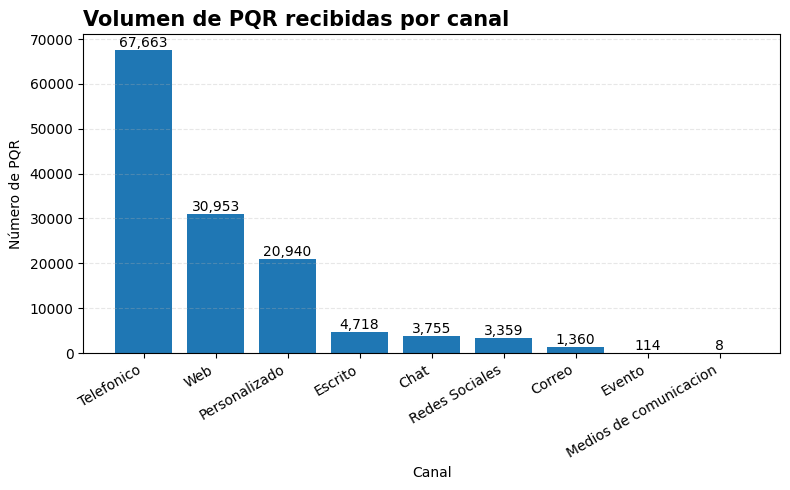

In [ ]:
# ===== Conteo de PQR por canal =====
conteo = (
    df_cundinamarca["canal_pqr"]
    .value_counts()
    .sort_values(ascending=False)
)

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(conteo.index, conteo.values)

ax.set_title(
    "Volumen de PQR recibidas por canal",
    fontsize=15,
    weight="bold",
    loc="left"
)

ax.set_xlabel("Canal")
ax.set_ylabel("Número de PQR")

ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.xticks(rotation=30, ha="right")

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

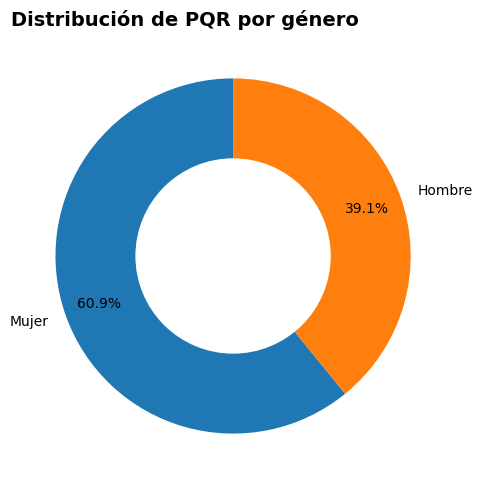

In [ ]:
# ===== Conteo por género =====
conteo = df_cundinamarca["genero_afectado"].value_counts()

# porcentajes
porcentajes = conteo / conteo.sum() * 100

# ===== Gráfico donut =====
fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    porcentajes,
    labels=porcentajes.index,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.8
)

# agujero central (donut)
centro = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centro)

ax.set_title(
    "Distribución de PQR por género",
    fontsize=14,
    weight="bold",
    loc="left"
)

plt.tight_layout()
plt.show()

**Análisis predictivo básico**


In [ ]:
#Variables predictoras
variables = [
    "patologia_tipo",
    "tipo_falla",
    "canal_pqr",
    "rango_edad_afectado",
    "regimen_afiliacion_afectado"
]

df_modelo = df_cundinamarca[variables + ["riesgo_bin"]].dropna()
df_modelo = pd.get_dummies(df_modelo, drop_first=True)

**Modelo predictivo simple**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_modelo.drop("riesgo_bin", axis=1)
y = df_modelo["riesgo_bin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pd.DataFrame({
    "variable": X.columns,
    "coeficiente": modelo.coef_[0]
}).sort_values("coeficiente", ascending=False)

,variable,coeficiente
18,canal_pqr_Redes Sociales,5.511935
6,"patologia_tipo_IRC, TRASPLANTE",3.334109
15,canal_pqr_Evento,2.311154
27,rango_edad_afectado_DE 6 A 12,0.948012
4,patologia_tipo_ICC (INSUFICIENCIA CARDIACA CON...,0.786995
21,rango_edad_afectado_DE 13 A 17,0.687656
5,"patologia_tipo_IRC, ENFERMEDAD RENAL",0.566175
30,regimen_afiliacion_afectado_PNA,0.445258
1,patologia_tipo_ENFERMEDAD CARDIOVASCULAR QUE R...,0.367772
33,regimen_afiliacion_afectado_Subsidiado,0.100643


Los coeficientes indican asociaciones estadísticas con la probabilidad de riesgo de vida, sin implicar relaciones causales. El modelo se utiliza únicamente como apoyo para la priorización temprana.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1:", f1_score(y_test, y_pred_rf))
print("RF AUC:", roc_auc_score(y_test, y_prob_rf))


RF Accuracy: 0.6547251699656306
RF F1: 0.629638599607115
RF AUC: 0.7112203979571537


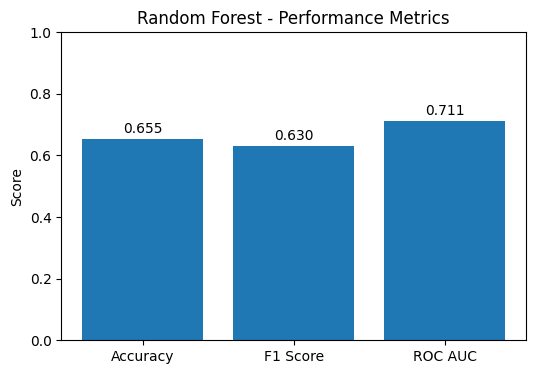

In [ ]:
# ===== Modelo =====
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# ===== Métricas =====
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

metrics = [acc, f1, auc]
labels = ["Accuracy", "F1 Score", "ROC AUC"]

plt.figure(figsize=(6,4))
plt.bar(labels, metrics)
plt.ylim(0, 1)
plt.title("Random Forest - Performance Metrics")
plt.ylabel("Score")

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB F1:", f1_score(y_test, y_pred_xgb))
print("XGB AUC:", roc_auc_score(y_test, y_prob_xgb))


XGB Accuracy: 0.6558290057951381
XGB F1: 0.6282818977429756
XGB AUC: 0.7140179071548197


Accuracy: 0.6558290057951381
F1: 0.6282818977429756
AUC: 0.7140179071548197


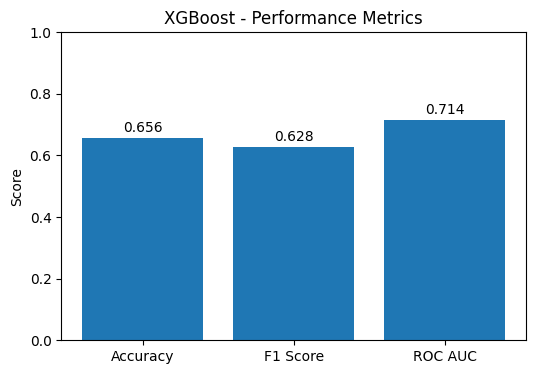

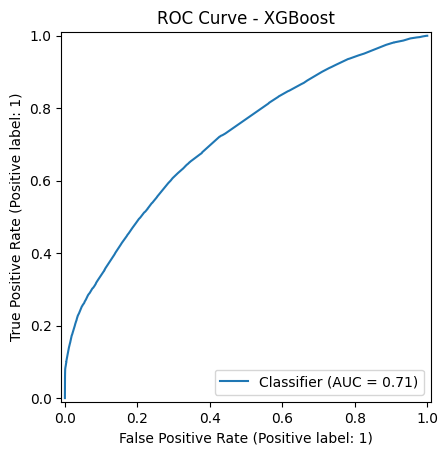

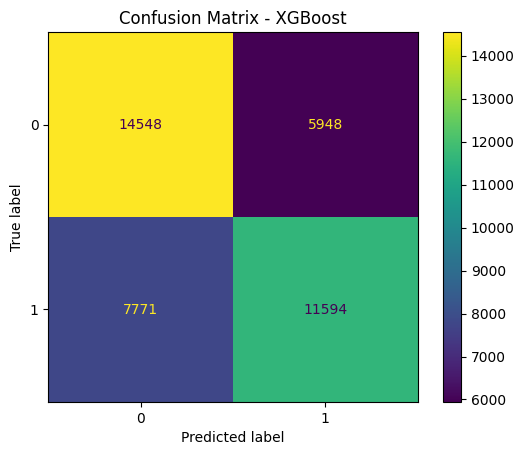

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay
)

# ===== Modelo =====
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# ===== Métricas =====
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("F1:", f1)
print("AUC:", auc)


# =========================
# 1️⃣ Barras métricas
# =========================
metrics = [acc, f1, auc]
labels = ["Accuracy", "F1 Score", "ROC AUC"]

plt.figure(figsize=(6,4))
plt.bar(labels, metrics)
plt.ylim(0, 1)
plt.title("XGBoost - Performance Metrics")
plt.ylabel("Score")

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


# =========================
# 2️⃣ Curva ROC
# =========================
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - XGBoost")
plt.show()


# =========================
# 3️⃣ Matriz de confusión
# =========================
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predicciones logística
y_pred_log = modelo.predict(X_test)
y_prob_log = modelo.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_prob_log)


In [ ]:
comparacion = pd.DataFrame({
    "Modelo": ["Logística", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy,
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1": [
        f1,
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC": [
        auc,
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

comparacion


,Modelo,Accuracy,F1,AUC
0,Logística,0.654524,0.624103,0.711973
1,Random Forest,0.654725,0.629639,0.711220
2,XGBoost,0.655829,0.628282,0.714018


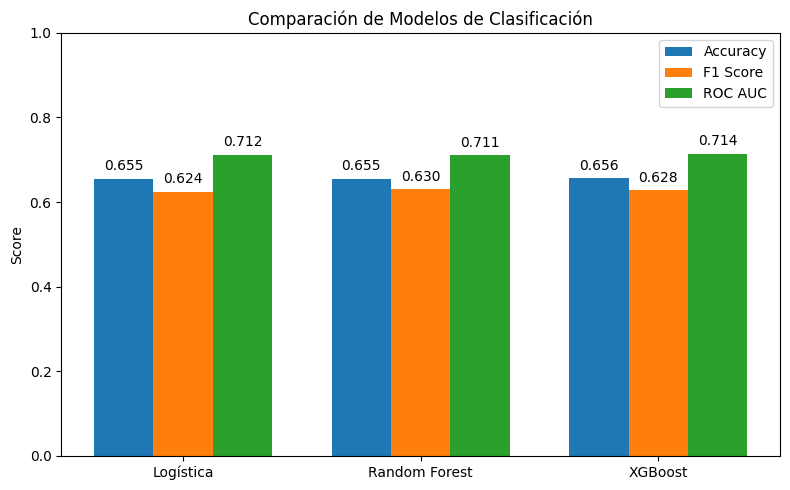

In [ ]:
# ===== Datos =====
modelos = comparacion["Modelo"]
accuracy = comparacion["Accuracy"]
f1 = comparacion["F1"]
auc = comparacion["AUC"]

x = np.arange(len(modelos))
width = 0.25

# ===== Plot =====
plt.figure(figsize=(8,5))

b1 = plt.bar(x - width, accuracy, width, label="Accuracy")
b2 = plt.bar(x, f1, width, label="F1 Score")
b3 = plt.bar(x + width, auc, width, label="ROC AUC")

plt.xticks(x, modelos)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparación de Modelos de Clasificación")
plt.legend()

# valores encima de las barras
for bars in [b1, b2, b3]:
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.02, f"{h:.3f}", ha='center')

plt.tight_layout()
plt.show()


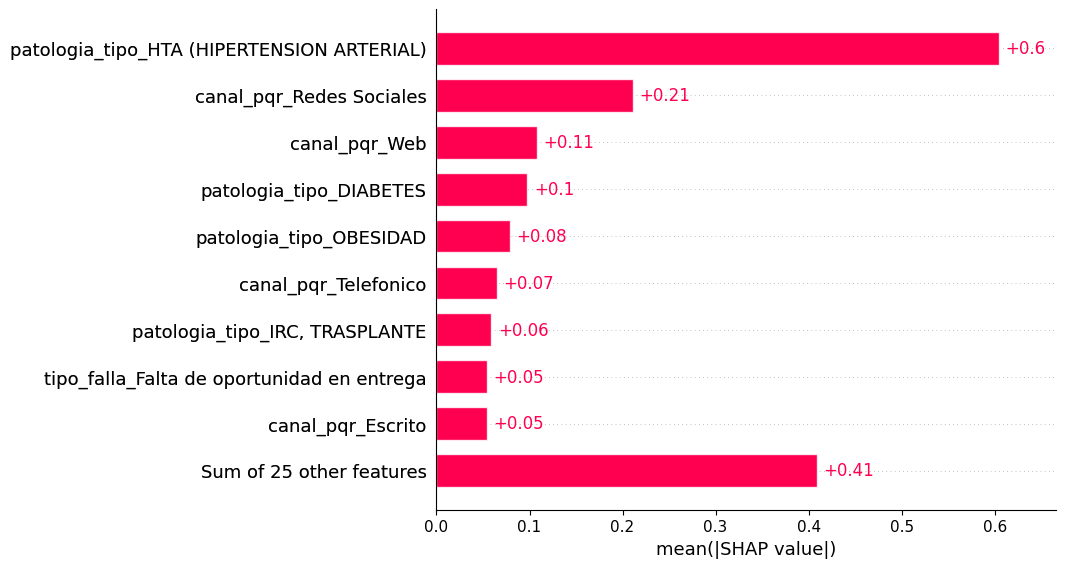

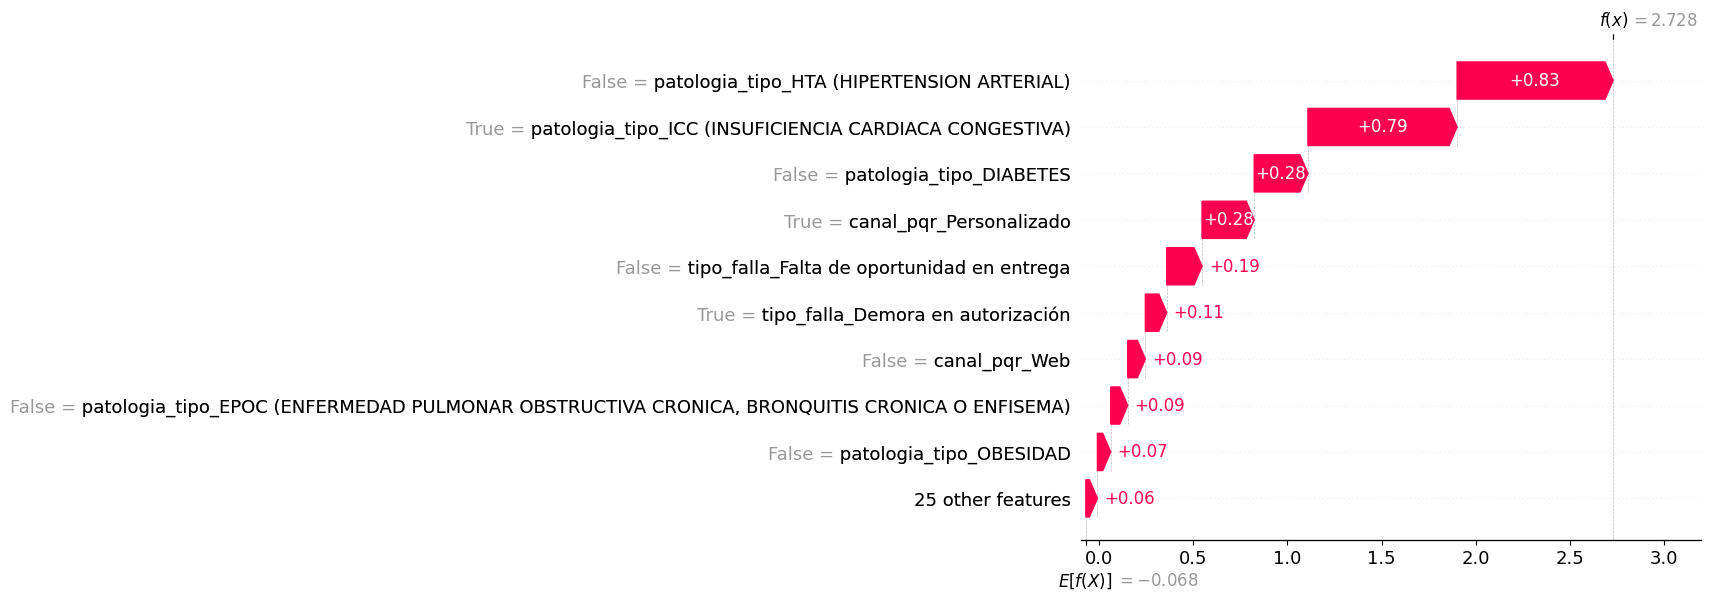

In [ ]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)        # importancia global
shap.plots.waterfall(shap_values[0])  # explicación individual


Probabilidad y uso responsable

In [ ]:
df_modelo["prob_riesgo_vida"] = modelo.predict_proba(X)[:, 1]
df_modelo["prob_riesgo_vida"].describe()

,prob_riesgo_vida
count,132870.000000
mean,0.482039
std,0.192591
min,0.080223
25%,0.340417
50%,0.416328
75%,0.609920
max,0.999968


In [ ]:
df_modelo[df_modelo["prob_riesgo_vida"] > 0.6].head()

,riesgo_bin,patologia_tipo_DIABETES,patologia_tipo_ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA,"patologia_tipo_EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",patologia_tipo_HTA (HIPERTENSION ARTERIAL),patologia_tipo_ICC (INSUFICIENCIA CARDIACA CONGESTIVA),"patologia_tipo_IRC, ENFERMEDAD RENAL","patologia_tipo_IRC, TRASPLANTE",patologia_tipo_OBESIDAD,patologia_tipo_SOBREPESO,tipo_falla_Demora en autorización,tipo_falla_Falta de oportunidad en entrega,tipo_falla_Negación de autorización,tipo_falla_Negación de entrega,canal_pqr_Correo,canal_pqr_Escrito,canal_pqr_Evento,canal_pqr_Medios de comunicacion,canal_pqr_Personalizado,canal_pqr_Redes Sociales,canal_pqr_Telefonico,canal_pqr_Web,rango_edad_afectado_DE 13 A 17,rango_edad_afectado_DE 18 A 24,rango_edad_afectado_DE 25 A 29,rango_edad_afectado_DE 30 A 37,rango_edad_afectado_DE 38 A 49,rango_edad_afectado_DE 50 A 62,rango_edad_afectado_DE 6 A 12,rango_edad_afectado_MAYOR DE 63,regimen_afiliacion_afectado_No Aplica,regimen_afiliacion_afectado_PNA,regimen_afiliacion_afectado_Particular,regimen_afiliacion_afectado_Regimen Especial,regimen_afiliacion_afectado_Subsidiado,prob_riesgo_vida
0,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0.820141
5,1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0.601769
12,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.617484
17,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.617484
18,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.617484


In [ ]:
# =====================
# Predicciones
# =====================
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:,1]

# =====================
# Métricas
# =====================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)

Accuracy: 0.6545244725420838
Precision: 0.6619571511291257
Recall: 0.5903434030467338
F1: 0.6241026340930804
AUC: 0.7119730162660569


In [ ]:
metricas = pd.DataFrame({
    "Metrica": ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"],
    "Valor": [accuracy, precision, recall, f1, auc]
})

metricas


,Metrica,Valor
0,Accuracy,0.654524
1,Precision,0.661957
2,Recall,0.590343
3,F1-score,0.624103
4,AUC-ROC,0.711973


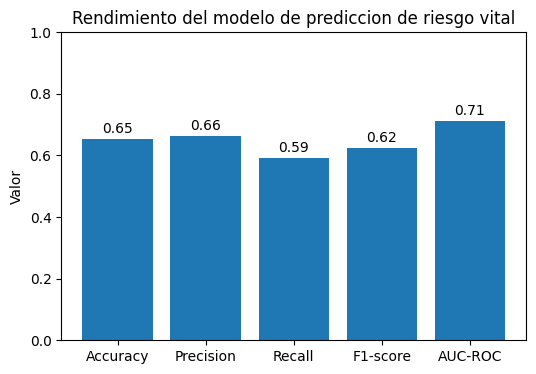

In [ ]:
plt.figure(figsize=(6,4))

bars = plt.bar(metricas["Metrica"], metricas["Valor"])

plt.ylim(0,1)
plt.title("Rendimiento del modelo de prediccion de riesgo vital")
plt.ylabel("Valor")

# mostrar números encima de cada barra
for i, v in enumerate(metricas["Valor"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()


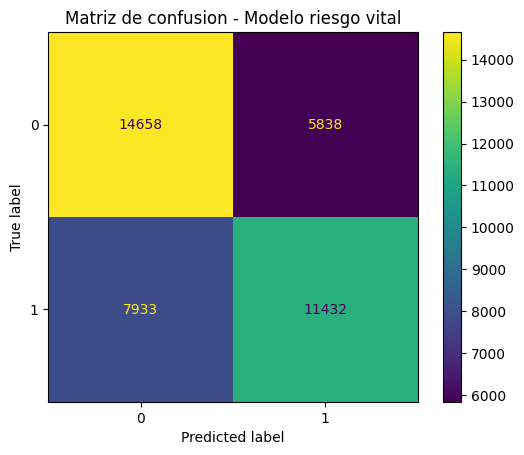

[[14658  5838]
 [ 7933 11432]]


In [ ]:

# matriz
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Matriz de confusion - Modelo riesgo vital")
plt.show()

print(cm)
